# Capstone project

### Importing the libraries

In [99]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np
from bs4 import BeautifulSoup
import requests
import json
import folium
print('libraries imported')

libraries imported


### Web-Scraping the Wikipedi Page to get neighbourhoods of Hyderabad

In [100]:
wikipedia_url = 'https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Hyderabad'
html = requests.get(wikipedia_url)
if html.status_code == 200:
    print('Successfully retrieved response from the url \n')

html = html.text     
#print(html)

Successfully retrieved response from the url 



### Using Beautiful Soup on fetched data

In [101]:
soup = BeautifulSoup(html, 'html.parser')
#print(soup.prettify())

### Extracting the required data from Beautiful soup object

In [102]:
scraped_data = []
data = soup.find("div", {"class":"mw-content-ltr"})
hood=data.findAll('li')
#len(hood)
filtered_data = hood[41:285]
for row in filtered_data:
    scraped_data.append(row.a.text)

In [103]:
scraped_data

['Ameerpet',
 'Begumpet',
 'SR Nagar',
 'Prakash Nagar',
 'Punjagutta',
 'Balkampet',
 'Sanathnagar',
 'Bharat Nagar',
 'Erragadda',
 'Borabanda',
 'Moti Nagar',
 'Khairtabad',
 'Somajiguda',
 'Raj Bhavan Road',
 'Lakdikapool',
 'Saifabad',
 'A.C. Guards',
 'Masab Tank',
 'Chintal Basti',
 'Musheerabad',
 'Chikkadpally',
 'Himayatnagar',
 'Ashok Nagar',
 'Domalguda',
 'Hyderguda',
 'Ramnagar',
 'Azamabad',
 'Adikmet',
 'Nallakunta',
 'Shanker Mutt',
 'RTC X Roads',
 'Bagh Lingampally',
 'Vidyanagar',
 'Amberpet',
 'Tilaknagar',
 'Golnaka',
 'Barkatpura',
 'Shivam Road',
 'Jamia Osmania',
 'Kachiguda',
 'Badichowdi',
 'Nampally',
 'Abids',
 'Aghapura',
 'Koti',
 'Bank Street',
 'Boggulkunta',
 'Secunderabad',
 'Chilkalguda',
 'Kavadiguda',
 'MG Road (James Street)',
 'Madannapet',
 'Minister Road',
 'Mylargadda',
 'Namalagundu',
 'Padmarao Nagar',
 'Pan bazar',
 'Parsigutta',
 'Patny',
 'Rani Gunj',
 'RP Road',
 'Sindhi Colony',
 'Sitaphalmandi',
 'Tarnaka',
 'Warsiguda',
 'Secunderabad

### storing the web scraped data into pandas dataframe

In [104]:
wiki_data = pd.DataFrame(scraped_data,columns=['Neighbourhood'])
wiki_data.head(10)

,Neighbourhood
0,Ameerpet
1,Begumpet
2,SR Nagar
3,Prakash Nagar
4,Punjagutta
5,Balkampet
6,Sanathnagar
7,Bharat Nagar
8,Erragadda
9,Borabanda


In [105]:
print('There are {} neighbourhoods in Hyderabad city'.format(wiki_data.shape[0]))
wiki_data.to_excel("hyderabad_neighbourhoods.xlsx")

There are 244 neighbourhoods in Hyderabad city


### Let's find the Latitude and Longitude for the neighbourhoods

In [106]:
# defining function to fetch the latitude, longitude of a requested neighbourhood
def get_coords(neighbourhood):
    headers = {'user-agent':'coordinate-app'}
    address = neighbourhood
    url = "https://nominatim.openstreetmap.org/search?q={}&limit=1&format=json".format(address)
    result = requests.get(url, headers=headers, timeout=1500)
    result.json()
    dict_1 = result.json()[0]
    latitude = dict_1['lat']
    longitude = dict_1['lon']
    #return print('The latitude and longitude of {} are {}, {}'.format(neighbourhood,latitude,longitude))
    return [latitude, longitude]
   
 

In [107]:
# Fetching the latitude and longitude coordinates for all the neighbourhoods

temp = [] # The latitudes and longitudes are stored in the temp variable

for hood in wiki_data['Neighbourhood']:
    try:
        #lat_lng = [get_coords(hood)]
        temp.append(get_coords(hood))
    except:
        temp.append(['Find Coordinates'])
      

In [108]:
# Testing the get_coords() function
#k = get_coords('lakshmi nagar, Hyderabad, India')
#k

url = "https://nominatim.openstreetmap.org/search?q={}&limit=1&format=json".format('hyderabad')
result = requests.get(url).text
result

'[{"place_id":259328421,"licence":"Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright","osm_type":"relation","osm_id":7868535,"boundingbox":["17.2916377","17.5608321","78.2387067","78.6223912"],"lat":"17.360589","lon":"78.4740613","display_name":"Hyderabad, Bahadurpura mandal, Hyderabad, Telangana, India","class":"boundary","type":"administrative","importance":0.6836118022682846,"icon":"https://nominatim.openstreetmap.org/ui/mapicons//poi_boundary_administrative.p.20.png"}]'

In [109]:
# Storing the data into a DataFrame
hyd_coords = pd.DataFrame(temp, columns=['Latitude', 'Longitude'])
hyd_coords.head()

,Latitude,Longitude
0,17.4375012,78.4482505
1,17.4440199,78.4624821
2,17.4452312,78.4449117
3,17.2300647,80.1331686
4,17.426957,78.4523925


In [110]:
# saving the data to an excel file
#hyd_coords.to_excel('Hyderabad_neighbourhood_coordinates.xlsx')

In [111]:
# neighbourhoods web-scraped from wikipedia website
wiki_data.head()

,Neighbourhood
0,Ameerpet
1,Begumpet
2,SR Nagar
3,Prakash Nagar
4,Punjagutta


In [112]:
hyd_data = wiki_data.join(hyd_coords)
hyd_data.head()

,Neighbourhood,Latitude,Longitude
0,Ameerpet,17.4375012,78.4482505
1,Begumpet,17.4440199,78.4624821
2,SR Nagar,17.4452312,78.4449117
3,Prakash Nagar,17.2300647,80.1331686
4,Punjagutta,17.426957,78.4523925


In [118]:
# saving the data to an excel file
#hyd_data.to_excel("hyd_data.xlsx")
#hyd_data = pd.read_excel("hyd_data.xlsx")
#hyd_data.drop(columns=['Unnamed: 0'], axis=1, inplace=True)
#hyd_data.head()

,Neighbourhood,Latitude,Longitude
0,Ameerpet,17.437501,78.448251
1,Begumpet,17.444020,78.462482
2,SR Nagar,17.445231,78.444912
3,Prakash Nagar,17.230065,80.133169
4,Punjagutta,17.426957,78.452393


## Using geopy library to get the latitude and longitude of Hyderabad city

In [119]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

address = 'Hyderabad, Telangana'

geolocator = Nominatim(user_agent="Telangana_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Hyderabad are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Hyderabad are 17.360589, 78.4740613.


## Creating Map of Hyderabad with neighbourhoods superimposed on top

In [120]:

map_hyd = folium.Map(location=[latitude, longitude],zoom_start=10)
for lat, lng, label in zip(hyd_data['Latitude'], hyd_data['Longitude'], hyd_data['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_hyd)  
    
map_hyd

### Defining Foursquare credentials and version

In [121]:
CLIENT_ID = 'PBZRJ1RQMS3C0YMDITUULDNOSW2P2F0I2ECWPRGFDJMVOBBA' 
CLIENT_SECRET = 'UU3GBPLKT25QAY5VO3S4RHPNHS5JUFDOANJHRUJPAAA4ZT3J' 
VERSION = '20180605' 
LIMIT = 100 

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: PBZRJ1RQMS3C0YMDITUULDNOSW2P2F0I2ECWPRGFDJMVOBBA
CLIENT_SECRET:UU3GBPLKT25QAY5VO3S4RHPNHS5JUFDOANJHRUJPAAA4ZT3J


### Exploring the first neighbourhood

In [122]:
hyd_data.loc[0,'Neighbourhood']

'Ameerpet'

Get the first neighbourhood coordinates

In [123]:
neighbourhood_latitude = hyd_data.loc[0, 'Latitude'] 
neighbourhood_longitude = hyd_data.loc[0, 'Longitude'] 

neighbourhood_name = hyd_data.loc[0, 'Neighbourhood']

print('Latitude and longitude values of {} are {}, {}.'.format(neighbourhood_name, 
                                                               neighbourhood_latitude, 
                                                               neighbourhood_longitude))

Latitude and longitude values of Ameerpet are 17.4375012, 78.4482505.


### Let's get top 100 venues that are in Ameerpet within a radius of 500 meters

In [124]:
LIMIT = 100
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighbourhood_latitude, 
    neighbourhood_longitude, 
    radius, 
    LIMIT)
url 

'https://api.foursquare.com/v2/venues/explore?&client_id=PBZRJ1RQMS3C0YMDITUULDNOSW2P2F0I2ECWPRGFDJMVOBBA&client_secret=UU3GBPLKT25QAY5VO3S4RHPNHS5JUFDOANJHRUJPAAA4ZT3J&v=20180605&ll=17.4375012,78.4482505&radius=500&limit=100'

Getting the results

In [125]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '60671dab8cf9a1798463e12f'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Ameerpet',
  'headerFullLocation': 'Ameerpet, Hyderabad',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 12,
  'suggestedBounds': {'ne': {'lat': 17.442001204500006,
    'lng': 78.45295845960325},
   'sw': {'lat': 17.433001195499994, 'lng': 78.44354254039675}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4c0745492e80a5939d7275f9',
       'name': 'Blue Fox',
       'location': {'address': 'Ameerpet',
        'lat': 17.437054394233186,
        'lng': 78.44591210514756,
        'labeledLatLngs': [{'label': 'display',
          'lat': 17.437054394233186,

### Function that extracts the categories of venue

In [126]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

### Clean the json and structure it into pandas dataframe

In [127]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = pd.json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Blue Fox,Indian Restaurant,17.437054,78.445912
1,Kakatiya Deluxe Mess,Diner,17.433435,78.447090
2,Minerva Coffee Shop,Indian Restaurant,17.437295,78.446074
3,Santosh Dhaba,Vegetarian / Vegan Restaurant,17.439442,78.448259
4,Sher-e-Punjab Dhaba,Indian Restaurant,17.438454,78.452262


In [128]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

12 venues were returned by Foursquare.


### Explore the venues in Hyderabad

In [129]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()['response']['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [130]:
hyderabad_venues = getNearbyVenues(names=hyd_data['Neighbourhood'],
                                   latitudes=hyd_data['Latitude'],
                                   longitudes=hyd_data['Longitude']
                                  )

In [131]:
hyderabad_venues.head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Ameerpet,17.437501,78.448251,Blue Fox,17.437054,78.445912,Indian Restaurant
1,Ameerpet,17.437501,78.448251,Kakatiya Deluxe Mess,17.433435,78.447090,Diner
2,Ameerpet,17.437501,78.448251,Minerva Coffee Shop,17.437295,78.446074,Indian Restaurant
3,Ameerpet,17.437501,78.448251,Santosh Dhaba,17.439442,78.448259,Vegetarian / Vegan Restaurant
4,Ameerpet,17.437501,78.448251,Sher-e-Punjab Dhaba,17.438454,78.452262,Indian Restaurant


### Checking the size of the resulting dataframe

In [132]:
print(hyderabad_venues.shape)
hyderabad_venues.head()

(1171, 7)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Ameerpet,17.437501,78.448251,Blue Fox,17.437054,78.445912,Indian Restaurant
1,Ameerpet,17.437501,78.448251,Kakatiya Deluxe Mess,17.433435,78.447090,Diner
2,Ameerpet,17.437501,78.448251,Minerva Coffee Shop,17.437295,78.446074,Indian Restaurant
3,Ameerpet,17.437501,78.448251,Santosh Dhaba,17.439442,78.448259,Vegetarian / Vegan Restaurant
4,Ameerpet,17.437501,78.448251,Sher-e-Punjab Dhaba,17.438454,78.452262,Indian Restaurant


### Checking the number of venues for each neighbourhood

In [133]:
hyderabad_venues.groupby('Neighbourhood').count()

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
A. S. Rao Nagar,6,6,6,6,6,6
A.C. Guards,11,11,11,11,11,11
Abids,20,20,20,20,20,20
Adikmet,4,4,4,4,4,4
Afzal Gunj,5,5,5,5,5,5
Aghapura,4,4,4,4,4,4
Alijah Kotla,1,1,1,1,1,1
Allwyn Colony,4,4,4,4,4,4
Alwal,4,4,4,4,4,4


### checking the number of unique venue categories in the result

In [134]:
print('There are {} uniques categories.'.format(len(hyderabad_venues['Venue Category'].unique())))

There are 184 uniques categories.


### Analyze each neighbourhood

In [135]:
# one hot encoding
hyderabad_onehot = pd.get_dummies(hyderabad_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
hyderabad_neighbourhood = hyderabad_venues[['Neighbourhood']] 

# move neighborhood column to the first column
neighbourhood_drop = hyderabad_onehot.drop('Neighborhood', axis=1)
hyderabad_fixed = hyderabad_neighbourhood.join(neighbourhood_drop)


hyderabad_fixed.head()

,Neighbourhood,ATM,Accessories Store,Afghan Restaurant,Airport Food Court,Airport Terminal,American Restaurant,Andhra Restaurant,Antique Shop,Arcade,Art Gallery,Asian Restaurant,Athletics & Sports,Auditorium,Auto Workshop,BBQ Joint,Bakery,Bank,Bar,Baseball Field,Basketball Court,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Buffet,Burger Joint,Bus Station,Bus Stop,Cafeteria,Café,Camera Store,Campground,Candy Store,Capitol Building,Castle,Chaat Place,Chinese Restaurant,City,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Convenience Store,Cosmetics Shop,Cultural Center,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Dhaba,Diner,Discount Store,Donut Shop,Drugstore,Eastern European Restaurant,Electronics Store,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fishing Store,Flea Market,Flower Shop,Fondue Restaurant,Food,Food Court,Food Stand,Food Truck,Football Stadium,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,Gift Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Historic Site,History Museum,Hockey Arena,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotel Pool,Hyderabadi Restaurant,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Lake,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Luggage Store,Market,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Monument / Landmark,Mosque,Motel,Mountain,Movie Theater,Multicuisine Indian Restaurant,Multiplex,Music Venue,New American Restaurant,Night Market,Nightclub,North Indian Restaurant,Optical Shop,Outdoor Supply Store,Outdoors & Recreation,Outlet Store,Paper / Office Supplies Store,Park,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Photography Studio,Pizza Place,Planetarium,Platform,Playground,Plaza,Pool Hall,Pub,Punjabi Restaurant,Record Shop,Recreation Center,Resort,Rest Area,Restaurant,River,Salad Place,Sandwich Place,Science Museum,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,South Indian Restaurant,Spa,Sporting Goods Shop,Sports Bar,Stadium,Supermarket,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Tibetan Restaurant,Toll Plaza,Tourist Information Center,Train Station,Turkish Restaurant,Udupi Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Wings Joint,Women's Store
0,Ameerpet,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Ameerpet,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Ameerpet,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Ameerpet,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

checking the new dataframe size

In [136]:
hyderabad_fixed.shape

(1171, 184)

### grouping rows by neighbourhood and by taking the mean of frequence of occurence of each category

In [137]:
hyderabad_grouped = hyderabad_fixed.groupby('Neighbourhood').mean().reset_index()
hyderabad_grouped.head()

,Neighbourhood,ATM,Accessories Store,Afghan Restaurant,Airport Food Court,Airport Terminal,American Restaurant,Andhra Restaurant,Antique Shop,Arcade,Art Gallery,Asian Restaurant,Athletics & Sports,Auditorium,Auto Workshop,BBQ Joint,Bakery,Bank,Bar,Baseball Field,Basketball Court,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Buffet,Burger Joint,Bus Station,Bus Stop,Cafeteria,Café,Camera Store,Campground,Candy Store,Capitol Building,Castle,Chaat Place,Chinese Restaurant,City,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Convenience Store,Cosmetics Shop,Cultural Center,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Dhaba,Diner,Discount Store,Donut Shop,Drugstore,Eastern European Restaurant,Electronics Store,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fishing Store,Flea Market,Flower Shop,Fondue Restaurant,Food,Food Court,Food Stand,Food Truck,Football Stadium,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,Gift Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Historic Site,History Museum,Hockey Arena,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotel Pool,Hyderabadi Restaurant,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Lake,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Luggage Store,Market,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Monument / Landmark,Mosque,Motel,Mountain,Movie Theater,Multicuisine Indian Restaurant,Multiplex,Music Venue,New American Restaurant,Night Market,Nightclub,North Indian Restaurant,Optical Shop,Outdoor Supply Store,Outdoors & Recreation,Outlet Store,Paper / Office Supplies Store,Park,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Photography Studio,Pizza Place,Planetarium,Platform,Playground,Plaza,Pool Hall,Pub,Punjabi Restaurant,Record Shop,Recreation Center,Resort,Rest Area,Restaurant,River,Salad Place,Sandwich Place,Science Museum,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,South Indian Restaurant,Spa,Sporting Goods Shop,Sports Bar,Stadium,Supermarket,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Tibetan Restaurant,Toll Plaza,Tourist Information Center,Train Station,Turkish Restaurant,Udupi Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Wings Joint,Women's Store
0,A. S. Rao Nagar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,A.C. Guards,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.090909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.090909,0.0,0.0,0.090909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.181818,0.0,0.090909,0.0,0.181818,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.090909,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

Confirming the new size

In [138]:
hyderabad_grouped.shape

(182, 184)

### Let's print each neighbourhood with top 5 most common venues

In [139]:
num_top_venues = 5

for hood in hyderabad_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = hyderabad_grouped[hyderabad_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----A. S. Rao Nagar----
               venue  freq
0   Department Store  0.33
1               Café  0.17
2              Diner  0.17
3     Clothing Store  0.17
4  Indian Restaurant  0.17


----A.C. Guards----
                     venue  freq
0    Hyderabadi Restaurant  0.18
1        Indian Restaurant  0.18
2                   Bakery  0.09
3  South Indian Restaurant  0.09
4               Shoe Store  0.09


----Abids----
               venue  freq
0  Indian Restaurant  0.20
1          Juice Bar  0.15
2              Hotel  0.10
3         Shoe Store  0.10
4   Department Store  0.05


----Adikmet----
            venue  freq
0             Gym  0.50
1  Ice Cream Shop  0.25
2            Café  0.25
3    Optical Shop  0.00
4   Movie Theater  0.00


----Afzal Gunj----
               venue  freq
0     Breakfast Spot   0.4
1  Indian Restaurant   0.2
2        Bus Station   0.2
3              Hotel   0.2
4                ATM   0.0


----Aghapura----
               venue  freq
0           Platform  0.2

                     venue  freq
0                     Café  0.38
1               Restaurant  0.12
2  New American Restaurant  0.12
3           Sandwich Place  0.12
4         Asian Restaurant  0.12


----Gachibowli----
                venue  freq
0                Café  0.17
1  Italian Restaurant  0.17
2    Department Store  0.08
3               Hotel  0.08
4             Stadium  0.08


----Gaddiannaram----
                  venue  freq
0                   Gym  0.33
1         Deli / Bodega  0.33
2             Multiplex  0.33
3  Outdoor Supply Store  0.00
4         Movie Theater  0.00


----Gandipet----
                     venue  freq
0           Breakfast Spot   1.0
1                      ATM   0.0
2  North Indian Restaurant   0.0
3                 Mountain   0.0
4            Movie Theater   0.0


----Ghatkesar----
               venue  freq
0  Indian Restaurant   0.5
1  Andhra Restaurant   0.5
2                ATM   0.0
3       Optical Shop   0.0
4           Mountain   0.0


----Golna

               venue  freq
0        Pizza Place  0.25
1  Indian Restaurant  0.25
2          Bookstore  0.25
3               Café  0.25
4       Optical Shop  0.00


----Musheerabad----
               venue  freq
0  Indian Restaurant  0.17
1        Coffee Shop  0.17
2      Movie Theater  0.17
3          BBQ Joint  0.17
4             Hostel  0.17


----Mylargadda----
                     venue  freq
0                      ATM   0.5
1                     Café   0.5
2  North Indian Restaurant   0.0
3                 Mountain   0.0
4            Movie Theater   0.0


----Nagole----
                     venue  freq
0         Department Store  0.33
1                   Garden  0.33
2                      Bar  0.33
3                      ATM  0.00
4  North Indian Restaurant  0.00


----Nallakunta----
                  venue  freq
0    Chinese Restaurant  0.67
1                Arcade  0.33
2                   ATM  0.00
3  Outdoor Supply Store  0.00
4         Movie Theater  0.00


----Namalagundu--

                            venue  freq
0              Photography Studio   1.0
1                          Mosque   0.0
2                        Mountain   0.0
3                   Movie Theater   0.0
4  Multicuisine Indian Restaurant   0.0


----Shamshabad----
                     venue  freq
0                    Dhaba  0.33
1                     Park  0.33
2                     Café  0.33
3                      ATM  0.00
4  North Indian Restaurant  0.00


----Shanker Mutt----
                venue  freq
0      Ice Cream Shop   0.2
1   Indian Restaurant   0.2
2           Juice Bar   0.2
3                 Bar   0.2
4  Chinese Restaurant   0.2


----Shivam Road----
                  venue  freq
0      Asian Restaurant  0.06
1    Mexican Restaurant  0.06
2  Gym / Fitness Center  0.06
3            Restaurant  0.06
4        Breakfast Spot  0.06


----Sikh Village----
                       venue  freq
0                       Café  0.33
1              Grocery Store  0.17
2          Indian Re

### Putting above data in a dataframe

In [140]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [141]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = hyderabad_grouped['Neighbourhood']

for ind in np.arange(hyderabad_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(hyderabad_grouped.iloc[ind, :], num_top_venues)

neighbourhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,A. S. Rao Nagar,Department Store,Café,Diner,Clothing Store,Indian Restaurant,Japanese Restaurant,Outlet Store,New American Restaurant,Night Market,Nightclub
1,A.C. Guards,Hyderabadi Restaurant,Indian Restaurant,Bakery,South Indian Restaurant,Shoe Store,Café,Middle Eastern Restaurant,Bus Station,Ice Cream Shop,Paper / Office Supplies Store
2,Abids,Indian Restaurant,Juice Bar,Hotel,Shoe Store,Department Store,Clothing Store,Shopping Mall,Diner,Gift Shop,Fast Food Restaurant
3,Adikmet,Gym,Ice Cream Shop,Café,Optical Shop,Movie Theater,Multicuisine Indian Restaurant,Multiplex,Music Venue,New American Restaurant,Night Market
4,Afzal Gunj,Breakfast Spot,Indian Restaurant,Bus Station,Hotel,ATM,North Indian Restaurant,Movie Theater,Multicuisine Indian Restaurant,Multiplex,Music Venue


### Cluster Neighbourhoods

In [142]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
%matplotlib inline

In [143]:
# Finding the k
hyderabad_grouped_clustering = hyderabad_grouped.drop('Neighbourhood', 1)
k_rng = range(1,10)
sum_of_squared_error = []
for i in k_rng:
    km = KMeans(n_clusters=i, init='random', random_state=0)
    km.fit(hyderabad_grouped_clustering)
    sum_of_squared_error.append(km.inertia_)
sum_of_squared_error

C:\Users\Swaroop\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[60.51328708943569,
 54.481349504664934,
 51.324470084585975,
 49.215799794362255,
 48.35617168945784,
 47.455715372653444,
 46.045475422092046,
 45.086139077283065,
 43.88188973944174]

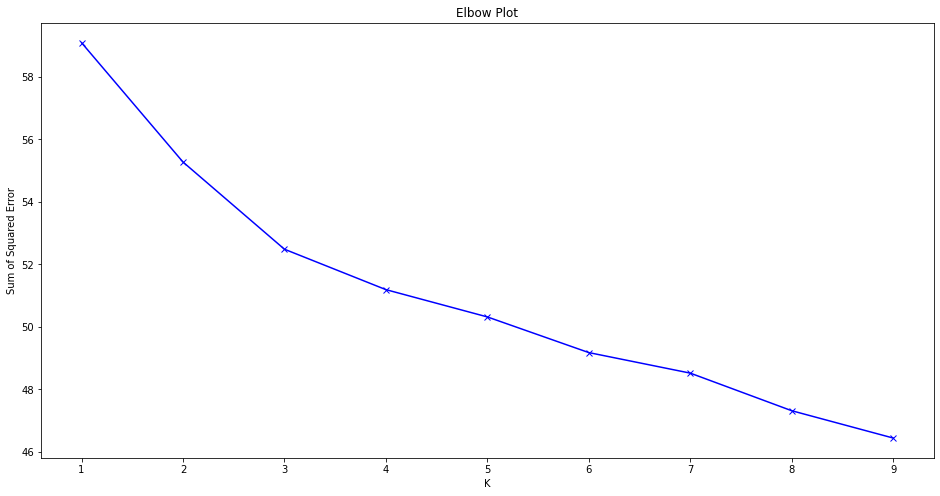

In [144]:
plt.figure(figsize=(16,8))
plt.title('Elbow Plot')
plt.xlabel('K')
plt.ylabel('Sum of Squared Error')
plt.plot(k_rng,sse, 'bx-')

In [145]:
# set number of clusters
kclusters = 3

#hyderabad_grouped_clustering = hyderabad_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(hyderabad_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 2, 2, 0, 2, 2, 0, 1, 0, 2])

In [146]:
# add clustering labels
neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

hyderabad_data = hyd_data

# merge hyderabad_grouped with hyd_data to add latitude/longitude for each neighbourhood
hyderabad_merged = hyd_data.merge(neighbourhoods_venues_sorted, on='Neighbourhood')

hyderabad_merged.head() 

,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ameerpet,17.437501,78.448251,2,Indian Restaurant,Hotel,Diner,Vegetarian / Vegan Restaurant,Food Court,Juice Bar,Sandwich Place,Buffet,Fast Food Restaurant,Nightclub
1,Begumpet,17.444020,78.462482,0,Clothing Store,Indian Restaurant,Hyderabadi Restaurant,Outdoors & Recreation,Shoe Store,Tea Room,Bar,Bank,Gym,Thai Restaurant
2,SR Nagar,17.445231,78.444912,2,Indian Restaurant,Department Store,Pizza Place,Sandwich Place,Bakery,ATM,North Indian Restaurant,Multicuisine Indian Restaurant,Multiplex,Music Venue
3,Punjagutta,17.426957,78.452393,0,Indian Restaurant,Fast Food Restaurant,Multiplex,Pizza Place,Sandwich Place,Shopping Mall,Furniture / Home Store,BBQ Joint,Electronics Store,Coffee Shop
4,Balkampet,17.446923,78.450451,2,Indian Restaurant,Bakery,Hockey Arena,Train Station,Light Rail Station,ATM,Movie Theater,Multicuisine Indian Restaurant,Multiplex,Music Venue


### Visualizing the clusters

In [147]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [148]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(hyderabad_merged['Latitude'], hyderabad_merged['Longitude'], hyderabad_merged['Neighbourhood'], hyderabad_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Examine the clusters

#### Cluster 1

In [149]:
hyderabad_merged.loc[hyderabad_merged['Cluster Labels'] == 0, hyderabad_merged.columns[[0] + list(range(3, hyderabad_merged.shape[1]))]]

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Begumpet,0,Clothing Store,Indian Restaurant,Hyderabadi Restaurant,Outdoors & Recreation,Shoe Store,Tea Room,Bar,Bank,Gym,Thai Restaurant
3,Punjagutta,0,Indian Restaurant,Fast Food Restaurant,Multiplex,Pizza Place,Sandwich Place,Shopping Mall,Furniture / Home Store,BBQ Joint,Electronics Store,Coffee Shop
5,Sanathnagar,0,Department Store,Basketball Court,ATM,Optical Shop,Movie Theater,Multicuisine Indian Restaurant,Multiplex,Music Venue,New American Restaurant,Night Market
6,Bharat Nagar,0,Pizza Place,Restaurant,Indian Restaurant,Burger Joint,Café,Lake,Sandwich Place,Multiplex,Music Venue,New American Restaurant
7,Erragadda,0,Farmers Market,Fruit & Vegetable Store,Bus Station,Metro Station,Mountain,Multicuisine Indian Restaurant,Multiplex,Music Venue,New American Restaurant,Night Market
8,Borabanda,0,ATM,Movie Theater,Music Venue,Mosque,Mountain,Multicuisine Indian Restaurant,Multiplex,New American Restaurant,Night Market,Nightclub
9,Moti Nagar,0,Fried Chicken Joint,Department Store,Donut Shop,Sports Bar,Café,Fast Food Restaurant,Metro Station,Shopping Mall,Night Market,Movie Theater
10,Khairtabad,0,Pizza Place,Platform,Dessert Shop,Plaza,Optical Shop,Movie Theater,Multicuisine Indian Restaurant,Multiplex,Music Venue,New American Restaurant
11,Somajiguda,0,Hotel,Indian Restaurant,Coffee Shop,Sandwich Place,Shoe Store,Pizza Place,Hotel Bar,Convenience Store,Donut Shop,Furniture / Home Store
19,Chikkadpally,0,ATM,Ice Cream Shop,Diner,Multiplex,Bakery,Breakfast Spot,North Indian Restaurant,Movie Theater,Multicuisine Indian Restaurant,Music Venue


#### Cluster 2

In [150]:
hyderabad_merged.loc[hyderabad_merged['Cluster Labels'] == 1, hyderabad_merged.columns[[0] + list(range(3, hyderabad_merged.shape[1]))]]

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
43,Mylargadda,1,ATM,Café,North Indian Restaurant,Mountain,Movie Theater,Multicuisine Indian Restaurant,Multiplex,Music Venue,New American Restaurant,Night Market
64,Asif Nagar,1,ATM,Fried Chicken Joint,Pharmacy,Nightclub,Motel,Mountain,Movie Theater,Multicuisine Indian Restaurant,Multiplex,Music Venue
65,Asif Nagar,1,ATM,Fried Chicken Joint,Pharmacy,Nightclub,Motel,Mountain,Movie Theater,Multicuisine Indian Restaurant,Multiplex,Music Venue
87,Nawab Saheb Kunta,1,ATM,Diner,Optical Shop,Mountain,Movie Theater,Multicuisine Indian Restaurant,Multiplex,Music Venue,New American Restaurant,Night Market
111,Allwyn Colony,1,ATM,Mosque,Mountain,Movie Theater,Multicuisine Indian Restaurant,Multiplex,Music Venue,New American Restaurant,Night Market,Nightclub
117,Patancheru,1,ATM,Breakfast Spot,Music Venue,North Indian Restaurant,Mountain,Movie Theater,Multicuisine Indian Restaurant,Multiplex,New American Restaurant,Night Market
120,Beeramguda,1,ATM,Mosque,Mountain,Movie Theater,Multicuisine Indian Restaurant,Multiplex,Music Venue,New American Restaurant,Night Market,Nightclub
132,Macha Bollaram,1,ATM,Lake,Optical Shop,Mountain,Movie Theater,Multicuisine Indian Restaurant,Multiplex,Music Venue,New American Restaurant,Night Market
153,Mallapur,1,ATM,Diner,Optical Shop,Mountain,Movie Theater,Multicuisine Indian Restaurant,Multiplex,Music Venue,New American Restaurant,Night Market
159,Bairamalguda,1,ATM,Garden Center,Night Market,North Indian Restaurant,Mountain,Movie Theater,Multicuisine Indian Restaurant,Multiplex,Music Venue,New American Restaurant


#### Cluster 3

In [151]:
hyderabad_merged.loc[hyderabad_merged['Cluster Labels'] == 2, hyderabad_merged.columns[[0] + list(range(3, hyderabad_merged.shape[1]))]]

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ameerpet,2,Indian Restaurant,Hotel,Diner,Vegetarian / Vegan Restaurant,Food Court,Juice Bar,Sandwich Place,Buffet,Fast Food Restaurant,Nightclub
2,SR Nagar,2,Indian Restaurant,Department Store,Pizza Place,Sandwich Place,Bakery,ATM,North Indian Restaurant,Multicuisine Indian Restaurant,Multiplex,Music Venue
4,Balkampet,2,Indian Restaurant,Bakery,Hockey Arena,Train Station,Light Rail Station,ATM,Movie Theater,Multicuisine Indian Restaurant,Multiplex,Music Venue
12,Raj Bhavan Road,2,Indian Restaurant,Juice Bar,Dessert Shop,Chinese Restaurant,Capitol Building,Pizza Place,Planetarium,Hotel,Jewelry Store,Outlet Store
13,Lakdikapool,2,Indian Restaurant,Dessert Shop,Boat or Ferry,Mobile Phone Shop,ATM,Optical Shop,Multicuisine Indian Restaurant,Multiplex,Music Venue,New American Restaurant
14,Saifabad,2,Hotel,Indian Restaurant,Ice Cream Shop,Coffee Shop,Shoe Store,Breakfast Spot,Science Museum,South Indian Restaurant,Bakery,Lounge
15,A.C. Guards,2,Hyderabadi Restaurant,Indian Restaurant,Bakery,South Indian Restaurant,Shoe Store,Café,Middle Eastern Restaurant,Bus Station,Ice Cream Shop,Paper / Office Supplies Store
16,Masab Tank,2,Indian Restaurant,Bakery,Park,Fast Food Restaurant,Restaurant,Café,Bus Station,Grocery Store,Fruit & Vegetable Store,Pizza Place
17,Chintal Basti,2,Mobile Phone Shop,Indian Restaurant,ATM,Optical Shop,Movie Theater,Multicuisine Indian Restaurant,Multiplex,Music Venue,New American Restaurant,Night Market
18,Musheerabad,2,Indian Restaurant,Coffee Shop,Movie Theater,BBQ Joint,Hostel,Food Truck,Persian Restaurant,Performing Arts Venue,Pharmacy,Multicuisine Indian Restaurant
